In [70]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import make_regression,fetch_california_housing
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds, lr:float=0.1):
    y_hat_train = np.repeat(np.mean(y_train),len(y_train))
    y_hat_test = np.repeat(np.mean(y_train),len(X_test))
    residuals = y_train-y_hat_train
    for i in range(0, boosting_rounds):
        model = model.fit(X_train,residuals)
        y_hat_train += lr*model.predict(X_train)
        y_hat_test += lr*model.predict(X_test)
        residuals = y_train - y_hat_train
    return y_hat_train,y_hat_test

In [72]:
X,y = make_regression(n_samples = 1000, n_features= 20, n_informative=15, n_targets = 1, bias = 0.0, noise= 20, shuffle= True)
X_train = X[:800]
y_train = y[:800]
X_test = X[800:]
y_test = y[800:]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


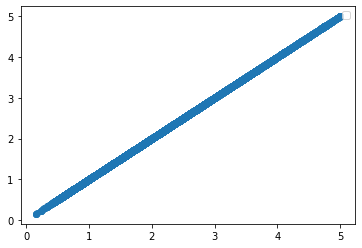

In [82]:
model = DecisionTreeRegressor(max_depth=100,max_features='sqrt',min_samples_split=2)
y_hat_train,y_hat_test = GradBoost(model,X_train,y_train,X_test,boosting_rounds=100,lr=0.1)
plt.scatter(y_train,y_hat_train)
plt.plot(y_train,y_train)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


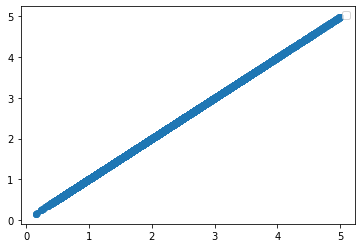

In [83]:
X,y = fetch_california_housing(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X, y)
y_hat_train,y_hat_test = GradBoost(model,X_train,y_train,X_test,boosting_rounds=50,lr=0.1)
plt.scatter(y_train,y_hat_train)
plt.plot(y_train,y_train)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


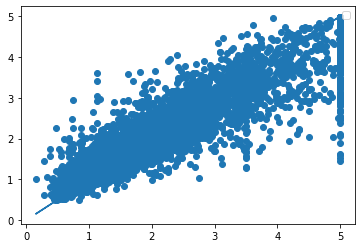

In [84]:
plt.scatter(y_test,y_hat_test)
plt.plot(y_test,y_test)
plt.legend()

In [85]:
r2_score(y_test,y_hat_test)

0.8171414810143506